In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import ast

import numpy as np
import pandas as pd

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter


In [6]:
merge_df = pd.read_csv("results/corr_all/384/boosting|ridge-top96/actcut-1/merge_all.csv")
merge_df = merge_df.sort_values("lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,deltafrac_double_mlde,deltafrac_single_mlde,deltafrac_ft_mlde,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.320,0.395,0.361667,0.736503,0.543099,0.194348,0.361667,0.736503,0.543099,0.194348
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.015,-0.030,0.171667,0.214611,0.190622,0.191627,0.171667,0.214611,0.190622,0.191627
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,-0.015,-0.485,0.011667,0.711499,0.436128,0.274028,0.013333,0.713166,0.437795,0.275694
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,-0.135,0.265,0.320000,0.447136,0.172117,0.276468,0.320000,0.447136,0.172117,0.276468
4,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.285,0.485,0.285000,0.727976,0.615088,0.391398,0.285000,0.727976,0.615088,0.391398
5,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.555,0.465,0.555000,0.832298,0.795031,0.770186,0.555000,0.832298,0.795031,0.770186
6,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.115,-0.080,0.116667,0.582033,0.449919,0.252764,0.120000,0.585366,0.453252,0.256098
7,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.190,-0.715,0.236667,0.747963,0.609074,0.451667,0.236667,0.747963,0.609074,0.451667
8,TrpB3I,3.0,7784.0,97.300000,2494.0,32.040082,0.062782,0.525375,114.0,0.072851,...,0.225,0.205,0.238333,0.888662,0.718587,0.286417,0.238333,0.888662,0.718587,0.286417
9,TrpB4,4.0,159129.0,99.455625,9783.0,6.147842,0.054049,0.408074,1093.0,0.021149,...,0.005,-0.045,0.185000,0.211090,0.160432,0.091801,0.185000,0.211090,0.160432,0.091801


In [7]:
corr_df = pd.read_csv('results/corr_all/384/boosting|ridge-top96/actcut-1/corr.csv')
corr_df

,descriptor,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,parent_rank_percent,...,delta_ft_top96_SSM,delta_ft-comb_recomb_SSM,delta_ft-comb_single_step_DE,delta_ft-comb_top96_SSM,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,n_site,1.000000,0.698430,-0.174608,0.696311,0.000000,-0.261116,-0.609272,0.696311,0.435194,...,0.174078,0.261116,0.087039,0.174078,-0.696311,-0.609272,-0.696311,-0.696311,-0.609272,-0.696311
1,numb_measured,0.698430,1.000000,0.500000,0.547115,0.024316,-0.231004,-0.802435,0.699091,0.577510,...,0.145897,0.182372,0.048632,0.145897,-0.310032,-0.370822,-0.437692,-0.310032,-0.370822,-0.437692
2,percent_measured,-0.174608,0.500000,1.000000,-0.109423,-0.109423,0.097265,-0.255320,0.066870,0.151976,...,-0.012158,-0.158055,-0.072949,-0.012158,0.297874,0.127660,0.133739,0.297874,0.127660,0.133739
3,numb_active,0.696311,0.547115,-0.109423,1.000000,0.709091,-0.624242,-0.406061,0.660606,0.515152,...,-0.503030,-0.357576,-0.563636,-0.503030,-0.587879,-0.660606,-0.600000,-0.587879,-0.660606,-0.600000
4,percent_active,0.000000,0.024316,-0.109423,0.709091,1.000000,-0.600000,0.018182,0.260606,0.321212,...,-0.854545,-0.709091,-0.842424,-0.854545,-0.127273,-0.296970,-0.163636,-0.127273,-0.296970,-0.163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,single_msa-comb_ndcg,-0.609272,-0.340427,0.279637,-0.018182,0.515152,-0.369697,0.612121,-0.539394,-0.393939,...,-0.551515,-0.600000,-0.539394,-0.551515,0.260606,0.115152,0.296970,0.260606,0.115152,0.296970
119,single_msa-comb_rocauc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,single_structnmsa-comb_rho,0.261116,-0.164134,-0.699091,0.127273,0.030303,-0.296970,-0.006061,0.200000,0.078788,...,0.151515,0.224242,0.163636,0.151515,-0.212121,-0.187879,-0.127273,-0.212121,-0.187879,-0.127273
121,single_structnmsa-comb_ndcg,-0.348155,-0.644380,-0.328269,0.066667,0.430303,-0.224242,0.745455,-0.381818,-0.369697,...,-0.648485,-0.733333,-0.636364,-0.648485,-0.224242,-0.345455,-0.054545,-0.224242,-0.345455,-0.054545


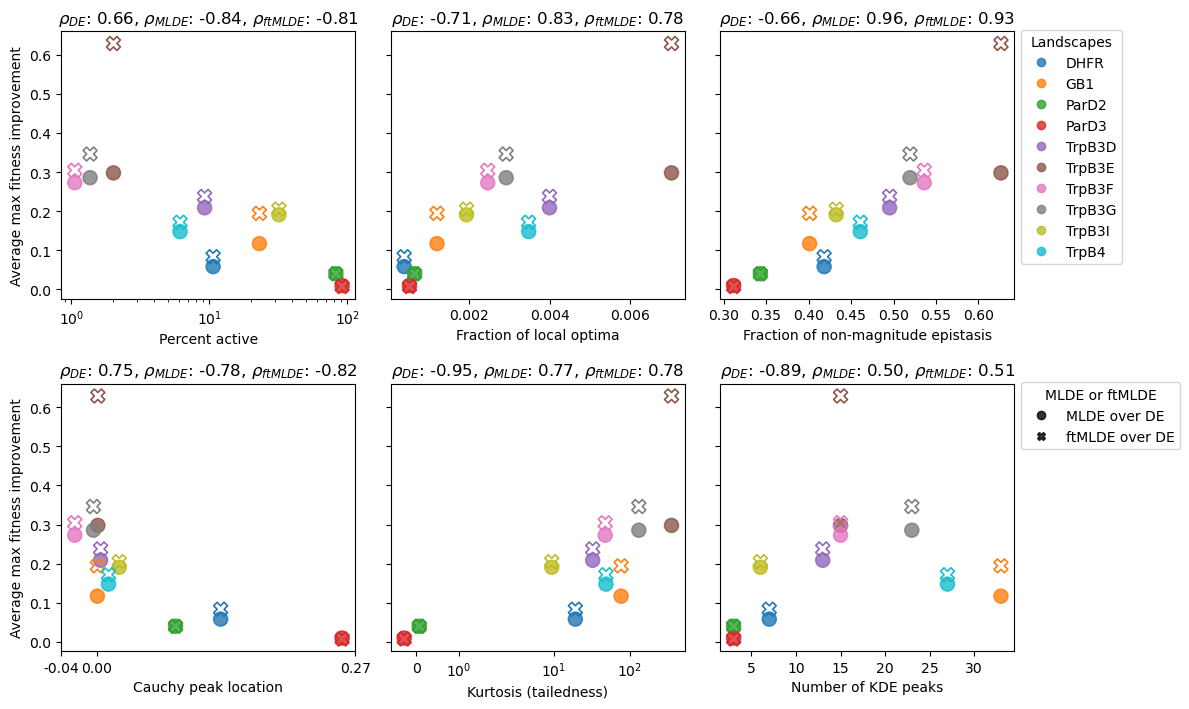

In [9]:
# merge_df = merge_df.set_index("lib")
pooled_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_double",
    ]
].mean(axis=1)
# ].max(axis=1)

fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

y = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
y2 = pooled_ft.to_list() - merge_df["single_step_DE_mean_all"]
clist = sns.color_palette("tab10").as_hex()
# factors = {"fraction_non-magnitude": , "percent_active": "Percent active", "frac_loc_opt_total": "Fraction of local optima"}

# Scatter plot on the first axes
# ax[0].errorbar(merge_df["fraction_non-magnitude"], y, yerr=de_std, fmt='o', c="gray", markersize=2)


# Scatter plot on the second axes
ax[0, 0].scatter(merge_df["percent_active"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 0].scatter(
    merge_df["percent_active"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 0].set_xscale("log")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[0, 0].set_xlabel("Percent active")

ax[0, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[0, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="percent_active"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["percent_active"])[0],
        spearmanr(y2, merge_df["percent_active"])[0],
    )
)

# Scatter plot on the third axes
ax[0, 1].scatter(merge_df["frac_loc_opt_total"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[0, 1].scatter(
    merge_df["frac_loc_opt_total"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[0, 1].set_xlabel("Fraction of local optima")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[0, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="frac_loc_opt_total"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["frac_loc_opt_total"])[0],
        spearmanr(y2, merge_df["frac_loc_opt_total"])[0],
    )
)

ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[0, 2].scatter(
    merge_df["fraction_non-magnitude"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[0, 2].set_xlabel("Fraction of non-magnitude epistasis")
ax[0, 2].set_title(
    # de rho corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0]
    # r'$\rho_{sub} = \frac{\alpha_{i}}{\beta^{2}_{i+1}}$ for $i = 1, 2, 3$'
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="fraction_non-magnitude"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["fraction_non-magnitude"])[0],
        spearmanr(y2, merge_df["fraction_non-magnitude"])[0],
    )
)


# Scatter plot on the second axes
ax[1, 0].scatter(merge_df["loc"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 0].scatter(
    merge_df["loc"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 0].set_xscale("symlog")
# ax[1].set_xlabel('fraction_non_magnitude')
ax[1, 0].set_xlabel("Cauchy peak location")
ax[1, 0].set_ylabel("Average max fitness improvement")
# ax[1].set_title('fraction_non-magnitude vs delta MLDE and DE max fitness achieved')
# ax[1].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["percent_active"])[0]))
ax[1, 0].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="loc"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["loc"])[0],
        spearmanr(y2, merge_df["loc"])[0],
    )
)
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax[1, 1].scatter(
    merge_df["kurt"], y, c=clist, s=100, alpha=0.8, linewidth=1.2
)
ax[1, 1].scatter(
    merge_df["kurt"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    marker="X",
    linewidth=1.2,
)
ax[1, 1].set_xlabel("Kurtosis (tailedness)")
ax[1, 1].set_xscale("symlog")
ax[1, 1].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="kurt"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["kurt"])[0],
        spearmanr(y2, merge_df["kurt"])[0],
    )
)

# Scatter plot on the third axes
ax[1, 2].scatter(merge_df["numb_kde_peak"], y, c=clist, s=100, alpha=0.8, linewidth=1.2)
ax[1, 2].scatter(
    merge_df["numb_kde_peak"],
    y2,
    edgecolors=clist,
    facecolors="none",
    s=100,
    linewidth=1.2,
    marker="X",
)
ax[1, 2].set_xlabel("Number of KDE peaks")
# ax[2].set_title(r'Spearmanr $\rho$: {:.2f}'.format(spearmanr(y, merge_df["frac_loc_opt_total"])[0]))
ax[1, 2].set_title(
    # r"MLDE $\rho$: {:.2f}, ftMLDE $\rho$: {:.2f}".format(
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}".format(
        corr_df[corr_df["descriptor"]=="numb_kde_peak"]["single_step_DE_mean_all"].values[0],
        spearmanr(y, merge_df["numb_kde_peak"])[0],
        spearmanr(y2, merge_df["numb_kde_peak"])[0],
    )
)

legend_list = []  # To store legend handles
legend_list2 = []

for l, lc in zip(merge_df["lib"], clist):
    legend_list.append(
        Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    )
ax[0, 2].legend(handles=legend_list, loc="upper left",title="Landscapes",bbox_to_anchor=(1, 1.0325))

for marker, label in zip(["o", "X"], ["MLDE", "ftMLDE"]):
    legend_list2.append(
        Line2D(
            [0],
            [0],
            marker=marker,
            linestyle="none",
            color="black",
            alpha=0.8,
            label=f"{label} over DE",
        )
    )
ax[1, 2].legend(handles=legend_list2, loc="upper left",title="MLDE or ftMLDE",bbox_to_anchor=(1, 1.0315))


# ax[2].set_xlabel('MLDE and DE max fitness achieved')
# fig.suptitle(
#     "(ft)MLDE Improvemence Over DE Across 10 Minimally Active Landscapes",
#     fontsize=12,
#     fontweight="bold",
#     y=0.975,
# )
# Show plot
plt.tight_layout()
plt.show()